In [34]:
from covariates_gclass import *
import seaborn as sns
import networkx as nx
import pandas as pd
from graspy.embed.ase import AdjacencySpectralEmbed as ASE
from graspy.utils import get_lcc
from graspy.plot import pairplot
sns.set()

In [29]:
def build_graph(dataframe):
    source = np.array(dataframe[dataframe.columns[0]])
    target = np.array(dataframe[dataframe.columns[1]])
    
    nodes = np.unique(np.concatenate((source, target)))
    A = np.zeros((len(nodes), len(nodes)))
    
    for i, node in enumerate(nodes):
        idx = np.where(source == node)[0]
        temp_targets = target[idx]
        for target_node in temp_targets:
            adj_idx = np.where(nodes == target_node)
            A[i, adj_idx] += 1
    
    return nodes, A

In [25]:
df = pd.read_csv('citeseer/citeseer.cites', delimiter='\t', header=None)
df.columns = ['cited', 'citer']
df.head()

,cited,citer
0,100157,100157
1,100157,364207
2,100157,38848
3,100157,bradshaw97introduction
4,100157,bylund99coordinating


In [55]:
attributes_df = pd.read_csv('citeseer/citeseer.content', delimiter='\t', header=None, low_memory=False)
attributes = np.array(attributes_df.iloc[:, 1:-1])
attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704
0,100157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Agents
1,100598,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,IR
2,105684,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Agents
3,11099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DB
4,114091,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AI


In [58]:
nodes, A = build_graph(df)
lcc, lcc_idx = get_lcc(A, return_inds=True)
lcc_nodes = nodes[lcc_idx]
lcc_idx, len(lcc_idx), np.sum(lcc)

(array([   0,    1,    7, ..., 3323, 3325, 3326]), 2120, 3768.0)

In [43]:
ase = ASE()
lcc = lcc + 0*np.diag(np.sum(lcc, axis=0))/len(lcc_idx)

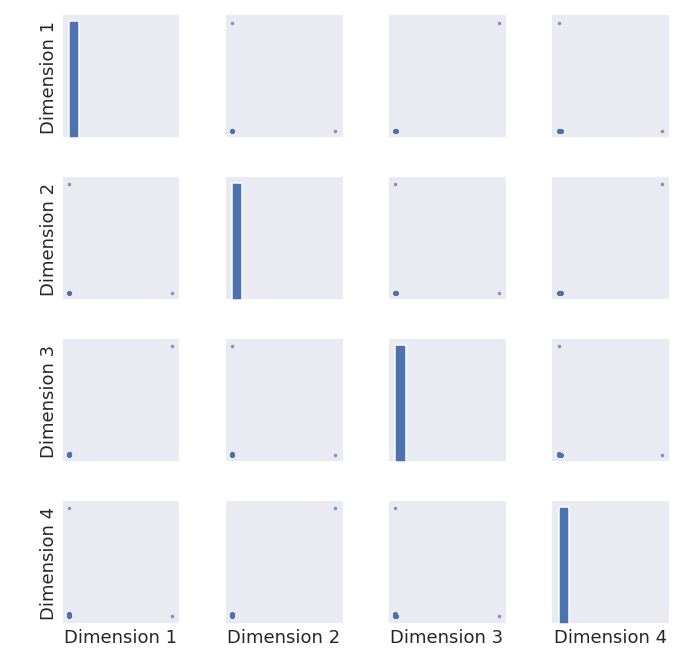

In [44]:
X_hat = np.concatenate(ase.fit_transform(lcc), axis = 1)
pairplot(X_hat)

In [10]:
len(np.array(df['cited']))

4732